In [212]:
import pandas as pd

In [213]:
import os.path
os.path.isfile("beijing_17_18_aq.csv") 
#pd.read_csv("beijing_17_18_aq.csv")

True

In [214]:
beji_aqi_2018=pd.read_csv("beijing_201802_201803_aq.csv")
beji_aqi_2017_2018=pd.read_csv("beijing_17_18_aq.csv")
beji_aqi_summary=pd.concat([beji_aqi_2018,beji_aqi_2017_2018],axis=0).sort_values(by=['utc_time'])
beji_aqi_summary=beji_aqi_summary.set_index([list(range(0,len(beji_aqi_summary)))])
#beji_aqi_summary


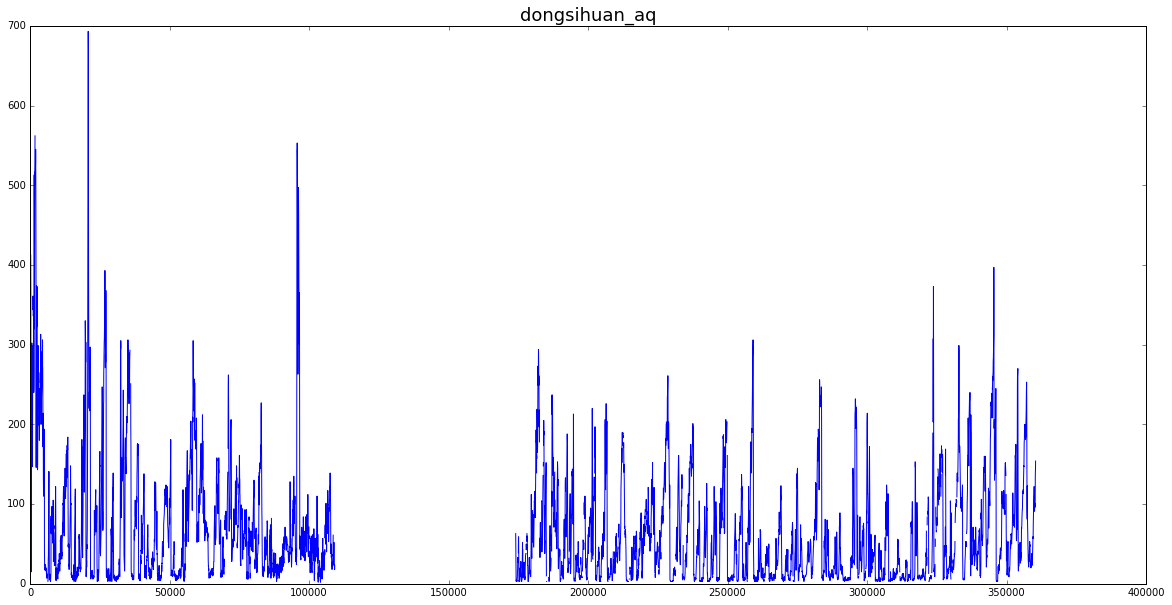

In [215]:
import gc
import matplotlib.pyplot as plt
gc.collect()
for key in beji_aqi_summary.groupby(['stationId']).groups:
    if key == 'dongsihuan_aq':   
        plt.clf()
        plt.figure(figsize=(20,10))
        plt.title(key,fontsize=18)
        temp_data=beji_aqi_summary.iloc[beji_aqi_summary.groupby(['stationId']).groups[key]]
        plt.plot(temp_data['PM2.5'])
        #plt.xtickets(temp_data['utc_time'], fontsize=15)
        plt.show()

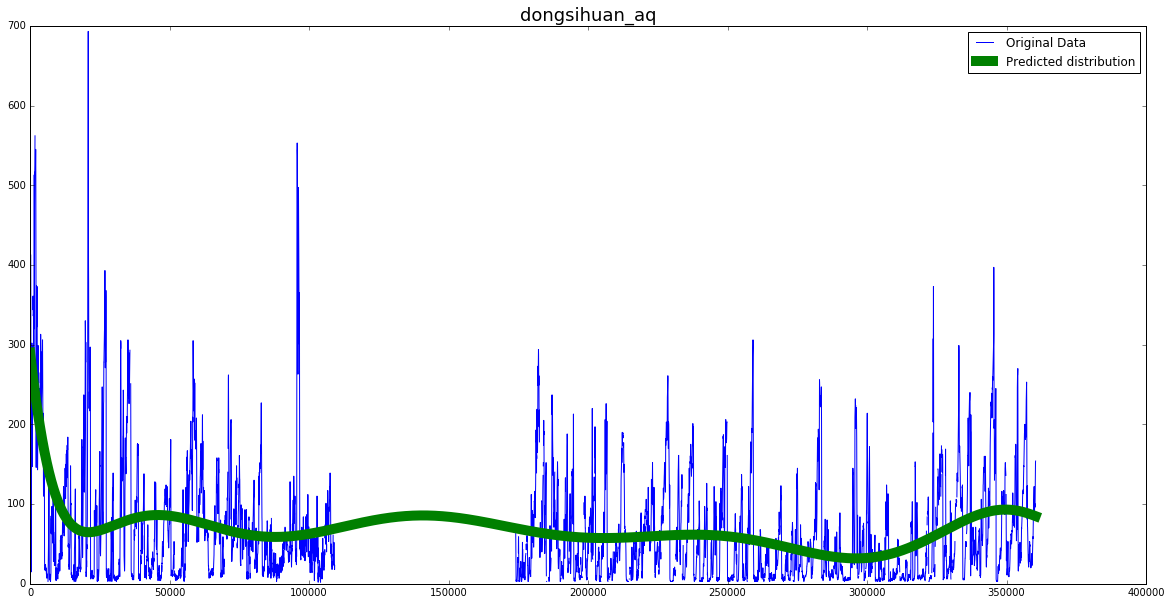

In [234]:
import numpy as np
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit

df = temp_data['PM2.5']
xdata = np.array(df.index.values)
ydata = np.array(df)

# Distribution Type 
idx = np.isfinite(xdata) & np.isfinite(ydata)
fitted = poly.polyfit(xdata[idx], ydata[idx], 10)
x_new = np.linspace(xdata[0], xdata[-1], num=len(x))
ffit = poly.polyval(x_new, fitted)

# Plot 
plt.clf()
plt.figure(figsize=(20,10))
plt.title('dongsihuan_aq',fontsize=18)
plt.plot(x_new,temp_data['PM2.5'],linewidth=1, label = 'Original Data')
plt.plot(x_new, ffit, linewidth=10, label = 'Predicted distribution')
plt.legend(loc='upper right')
plt.show()

# Generate Predicted Missing Data
# Question : What kind of noise ?
